In [1]:
#Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

Load the dataset

In [3]:
gf = pd.read_csv(r"C:\Users\YASH\Downloads\gapminder_full.csv") #gf: gapmindr_full 
gg = pd.read_csv(r"C:\Users\YASH\Downloads\gapminder_gapminder.csv") # gg: gapminder_gapminder

Display the first few rows

In [5]:
gf.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [6]:
gf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [7]:
gg.head()

,Unnamed: 0,country,continent,year,population,life_exp,gdp_cap
0,11,Afghanistan,Asia,2007,31889923,43.828,974.580338
1,23,Albania,Europe,2007,3600523,76.423,5937.029526
2,35,Algeria,Africa,2007,33333216,72.301,6223.367465
3,47,Angola,Africa,2007,12420476,42.731,4797.231267
4,59,Argentina,Americas,2007,40301927,75.320,12779.379640


In [8]:
gg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  142 non-null    int64  
 1   country     142 non-null    object 
 2   continent   142 non-null    object 
 3   year        142 non-null    int64  
 4   population  142 non-null    int64  
 5   life_exp    142 non-null    float64
 6   gdp_cap     142 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 7.9+ KB


#### Objectives

**1.** How many countries does the dataset have?

In [12]:
gf['country'].nunique()

142

**2.** Create a pivot table that shows the average life expectancy for each continent and year. Index by 'continent', use 'year' as columns, and 'life_exp' as values.

In [14]:
pivot = pd.pivot_table(gf,values='life_exp',index='continent',columns='year')
pivot

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


**3.** Which countries had a GDP per capita higher than the 75th percentile in 2007?

In [16]:
#filtering the year
df_3 = gf[gf['year']==2007]

#finding out and storing 75th percentile value in a variable
value = df_3['gdp_cap'].quantile(0.75)
print(f"75th percentile value: {value.round(2)}")

75th percentile value: 18008.84


In [17]:
#filtering out dataframe for gdp value condition  
df_3 = df_3[df_3['gdp_cap']>value]
# printing countries
df_3['country'].unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong, China', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait', 'Netherlands',
       'New Zealand', 'Norway', 'Oman', 'Portugal', 'Puerto Rico',
       'Saudi Arabia', 'Singapore', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'United Kingdom',
       'United States'], dtype=object)

**4.** Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.

In [19]:
# the edges of the bins for categorizing life expectancy
bins=[0,25,50,75,100]
# the labels corresponding to each bin
labels=["Low","Medium","High","Very High"]
# Categorize the 'life_exp' column into the defined bins
gf['Life_Exp_Range'] = pd.cut(gf['life_exp'], bins=bins, labels=labels)

gf

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Medium
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Medium
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Medium
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Medium
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Medium
...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306,High
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,High
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,Medium
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,Medium


**5.** Identify the top 5 countries with the highest GDP per capita in 2007. Use a horizontal bar chart to display this data.

In [21]:
# Filter the dataframe 'gf' to include only the rows where the 'year' column is 2007
df_5 = gf[gf['year']==2007]
# Sort the filtered dataframe 'df_5' by the 'gdp_cap' column in descending order
df_5 = df_5.sort_values(by='gdp_cap',ascending=False)
# Display the first 5 rows of the sorted dataframe
df_5[['country','gdp_cap','year']].head()

,country,gdp_cap,year
1151,Norway,49357.19017,2007
863,Kuwait,47306.98978,2007
1367,Singapore,47143.17964,2007
1619,United States,42951.65309,2007
755,Ireland,40675.99635,2007


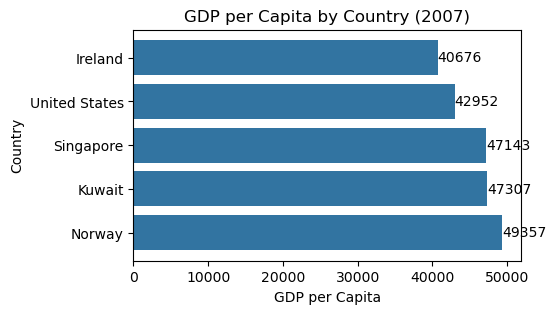

In [22]:
# storing top 5 countries in new variable
data = df_5[['country','gdp_cap']].head()

# Add labels and title
plt.figure(figsize=(5,3))
plt.xlabel('GDP per Capita')
plt.ylabel('Country')
plt.title('GDP per Capita by Country (2007)')
# plotting Horizontal Bar Chart
plt.barh(data['country'], data['gdp_cap'], color='#3274a1')
# Data Labels
for index, value in enumerate(data['gdp_cap']):
    plt.text(value, index, f'{value:.0f}', va='center')
    
plt.show()

**6.** Find all country names that start with "I" and end with "a" using regex.

In [24]:
# creating string of countries names seperated by space ' ' for regex to operate
string_of_countries = ' '.join(gf['country'].unique())
# created regex pattern 
pattern = r'\bI\w*a\b'
# finding all list of patterns(country) that matches in string of countries
match = re.findall(pattern, string_of_countries)

match

['India', 'Indonesia']

**7.** Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.

In [26]:
# filtering with year 
df_7 = gf[gf['year']==2007]
# sum of gdp per continent
df_7.groupby('continent')['gdp_cap'].sum().astype(int).reset_index()

,continent,gdp_cap
0,Africa,160629
1,Americas,275075
2,Asia,411609
3,Europe,751634
4,Oceania,59620


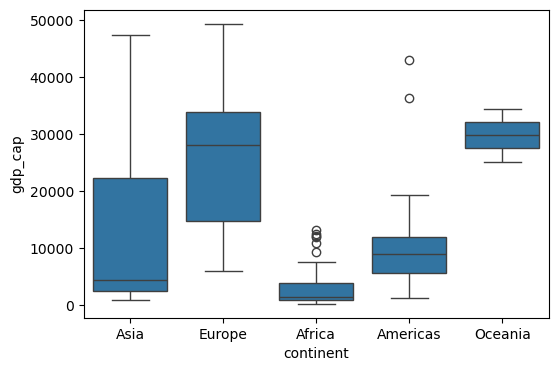

In [27]:
# box plot using seaborn
plt.figure(figsize=(6,4))
chart = sns.boxplot(data=df_7,x='continent', y='gdp_cap')

**8.** Find all countries with a life expectancy of over 80 years in 2007. List these countries and their respective continents.


In [29]:
df_8 = gf[gf['year']==2007]
df_8 = df_8[['country','life_exp']][df_8['life_exp']>80]

#sorting by life expectancy from highest to lowest
df_8 = df_8.sort_values(by='life_exp',ascending=False)
df_8

,country,life_exp
803,Japan,82.603
671,"Hong Kong, China",82.208
695,Iceland,81.757
1487,Switzerland,81.701
71,Australia,81.235
1427,Spain,80.941
1475,Sweden,80.884
767,Israel,80.745
539,France,80.657
251,Canada,80.653


**9.** Convert the 'year' column to a datetime type and extract the decade. Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).

In [31]:
gf['year'] = pd.to_datetime(gf['year'],format='%Y')

In [32]:
gf['decade'] = (gf['year'].dt.year //10) * 10

In [33]:
gf.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range,decade
0,Afghanistan,1952-01-01,8425333,Asia,28.801,779.445314,Medium,1950
1,Afghanistan,1957-01-01,9240934,Asia,30.332,820.853030,Medium,1950
2,Afghanistan,1962-01-01,10267083,Asia,31.997,853.100710,Medium,1960
3,Afghanistan,1967-01-01,11537966,Asia,34.020,836.197138,Medium,1960
4,Afghanistan,1972-01-01,13079460,Asia,36.088,739.981106,Medium,1970


**10.** Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset. Then, use Seaborn to visualize this correlation matrix as a heatmap.

In [35]:
# creating correlation matrix
matrix = gf[['gdp_cap','life_exp','population']].corr()
matrix

,gdp_cap,life_exp,population
gdp_cap,1.000000,0.583706,-0.025600
life_exp,0.583706,1.000000,0.064955
population,-0.025600,0.064955,1.000000


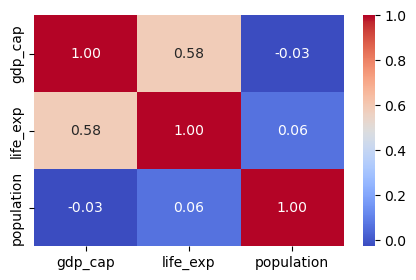

In [36]:
# heatmap of matrix using seaborn
plt.figure(figsize=(5,3))
chart = sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")

**11.** How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend.

In [39]:
df_11 = gf

df_11 = df_11.groupby(['year'])['life_exp'].mean().astype(int).reset_index()
df_11

,year,life_exp
0,1952-01-01,49
1,1957-01-01,51
2,1962-01-01,53
3,1967-01-01,55
4,1972-01-01,57
5,1977-01-01,59
6,1982-01-01,61
7,1987-01-01,63
8,1992-01-01,64
9,1997-01-01,65


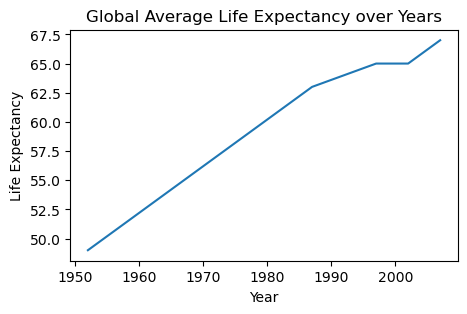

In [40]:
plt.figure(figsize=(5, 3))
plt.title('Global Average Life Expectancy over Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

chart = sns.lineplot(data=df_11, x='year', y='life_exp')

`Subjective Question:` **Discuss the various reasons that could have contributed to the change.**

In [43]:
#df_11 = gf.groupby(['year','continent'])['life_exp'].mean().reset_index()
#chart = sns.lineplot(data=df_11, x='year', y='life_exp', hue='continent')

#### Medical Advancements:

- **Vaccinations:** Widespread immunization against diseases like polio, measles, and smallpox.
- **Antibiotics and Antivirals:** Development and distribution of antibiotics and antiviral medications.
- **Surgical Techniques:** Improvements in surgical procedures and post-operative care.

#### Public Health Initiatives:

- **Sanitation:** Better sanitation and clean water supply.
- **Health Education:** Increased awareness and education about health and hygiene.
- **Disease Control:** Effective control and eradication of infectious diseases.

#### Economic Growth:

- **Improved Living Standards:** Higher income levels leading to better nutrition and living conditions.
- **Healthcare Access:** Increased access to healthcare services and facilities.

#### Technological Innovations:

- **Medical Technology:** Advances in medical technology, including diagnostic tools and treatment methods.
- **Information Technology:** Use of information technology in healthcare management and delivery.

#### Globalization:

- **Knowledge Sharing:** Faster dissemination of medical knowledge and practices across the globe.
- **International Aid:** Increased international aid and support for health programs in developing countries.
Policy and Governance:

#### Health Policies: Implementation of effective health policies and programs by governments.
- **International Organizations:** Role of international organizations like WHO in promoting global health.
  
These factors collectively contributed to the significant increase in global average life expectancy from 1952 to 2007.

**12.** For the year 2007, analyze the relationship between life expectancy and GDP per capita. 

In [47]:
df_12 = gf[gf['year'].dt.year==2007]

matrix = df_12[['life_exp','gdp_cap']].corr()
matrix

,life_exp,gdp_cap
life_exp,1.000000,0.678662
gdp_cap,0.678662,1.000000


`Subjective Question:` **Is there a noticeable trend or correlation? Represent this using a scatter plot.**

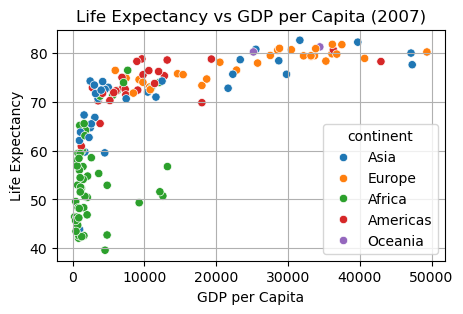

In [50]:
# Data titles and labels
df_12 = gf[gf['year'].dt.year==2007]
plt.figure(figsize=(5, 3))
plt.title('Life Expectancy vs GDP per Capita (2007)')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True)

# scatter plot for life expectancy over gdp per capita
chart = sns.scatterplot(data=df_12, x='gdp_cap', y='life_exp', hue='continent')

#### Overall Trend

There is a positive correlation between GDP per capita and life expectancy. As GDP per capita increases, life expectancy also tends to increase.

#### Continental Differences

`Africa`: African countries generally have lower GDP per capita and lower life expectancy. Most of the green dots are clustered in the lower-left region of the graph.ncy.

`Asia`: Asian countries show a wide range in GDP per capita and life expectancy. There are countries in Asia with low GDP per capita and low life expectancy, as well as countries with high GDP per capita and high life expectancy.

`Europe`: European countries tend to have higher GDP per capita and higher life expectancy. The orange dots are mostly concentrated in the upper-right region of the graph.

`Americas`: Countries in the Americas also show a broad range but tend to cluster towards higher GDP per capita and higher life expectancy, though not as high as Europe.

`Oceania`: Countries in Oceania (though fewer in number) tend to have high GDP per capita and high life expectancy.

#### Economic Development and Health

- Countries with higher economic development (higher GDP per capita) tend to have better health outcomes, as indicated by higher life expectancy.
- There are diminishing returns at higher levels of GDP per capita where increases in GDP per capita do not result in significant increases in life expectancy.

#### Concentration and Spread

- European countries are the most tightly clustered, suggesting a more uniform standard of living and health outcomes across the continent.
- African countries are more spread out, indicating more variability in economic and health outcomes.

**In summary, the graph effectively shows the strong link between economic prosperity (GDP per capita) and health outcomes (life expectancy), with clear disparities across different continents. While higher GDP per capita generally correlates with higher life expectancy, there are significant regional variations and outliers that suggest other influencing factors.**

**13.** Compare the average GDP per capita for each continent in the year 2007. Use a bar chart for this comparison.


In [53]:
df_13 = gf[gf['year'].dt.year==2007]
df_13 = df_13.groupby('continent')['gdp_cap'].mean().astype(int).reset_index()
df_13

,continent,gdp_cap
0,Africa,3089
1,Americas,11003
2,Asia,12473
3,Europe,25054
4,Oceania,29810


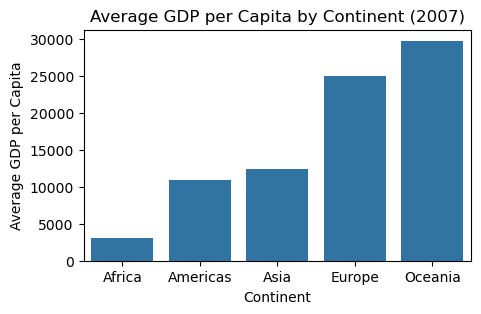

In [54]:
plt.figure(figsize=(5, 3))
plt.title('Average GDP per Capita by Continent (2007)')
plt.xlabel('Continent')
plt.ylabel('Average GDP per Capita')

chart = sns.barplot(data=df_13, x='continent', y='gdp_cap')

`Subjective Question:` **Why is the average GDP per capita for Oceania higher than the Americas even though the Americas have more countries?**


The average GDP per capita for Oceania is higher than the Americas even though the Americas have more countries because Oceania includes countries like Australia and New Zealand, which have very high GDP per capita. In contrast, the Americas include a mix of countries with varying levels of GDP per capita, including some with much lower GDP per capita, which brings down the average.

**14.** Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts) and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.


In [59]:
df_14 = gf[(gf['country'].isin(['Afghanistan', 'Switzerland'])) & (gf['year'].dt.year == 2007)]
df_14

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range,decade
11,Afghanistan,2007-01-01,31889923,Asia,43.828,974.580338,Medium,2000
1487,Switzerland,2007-01-01,7554661,Europe,81.701,37506.419070,Very High,2000


- Firstly, for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries.

C:\Users\YASH\AppData\Local\Temp\ipykernel_38756\2621151610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart1 = sns.barplot(data=df_14, x='country', y='life_exp', ax=ax1[0], palette='viridis')
C:\Users\YASH\AppData\Local\Temp\ipykernel_38756\2621151610.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart2 = sns.barplot(data=df_14, x='country', y='gdp_cap', ax=ax1[1], palette='viridis')


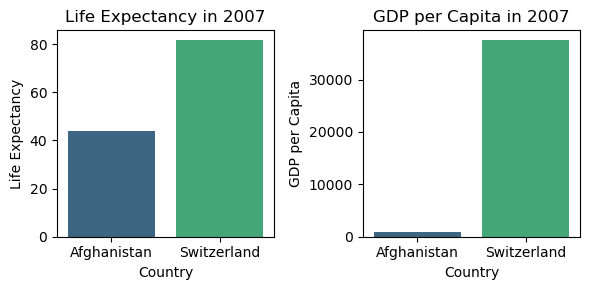

In [61]:
# Plot a bar chart to compare life expectancy and GDP per capita
fig, ax1 = plt.subplots(1, 2, figsize=(6, 3))

# Bar chart for Life Expectancy
chart1 = sns.barplot(data=df_14, x='country', y='life_exp', ax=ax1[0], palette='viridis')
ax1[0].set_title('Life Expectancy in 2007')
ax1[0].set_ylabel('Life Expectancy')
ax1[0].set_xlabel('Country')

# Bar chart for GDP per capita
chart2 = sns.barplot(data=df_14, x='country', y='gdp_cap', ax=ax1[1], palette='viridis')
ax1[1].set_title('GDP per Capita in 2007')
ax1[1].set_ylabel('GDP per Capita')
ax1[1].set_xlabel('Country')

plt.tight_layout()
plt.show()

- Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries.

In [63]:
df_14 = gf[(gf['country'].isin(['Afghanistan','Switzerland']))]
# grouping by country and decade
# then finding average of life expectancy in whole number(integer)
df_14.groupby(['country','decade'])['gdp_cap'].mean().astype(int).reset_index()

,country,decade,gdp_cap
0,Afghanistan,1950,800
1,Afghanistan,1960,844
2,Afghanistan,1970,763
3,Afghanistan,1980,915
4,Afghanistan,1990,642
5,Afghanistan,2000,850
6,Switzerland,1950,16321
7,Switzerland,1960,21698
8,Switzerland,1970,27088
9,Switzerland,1980,29339


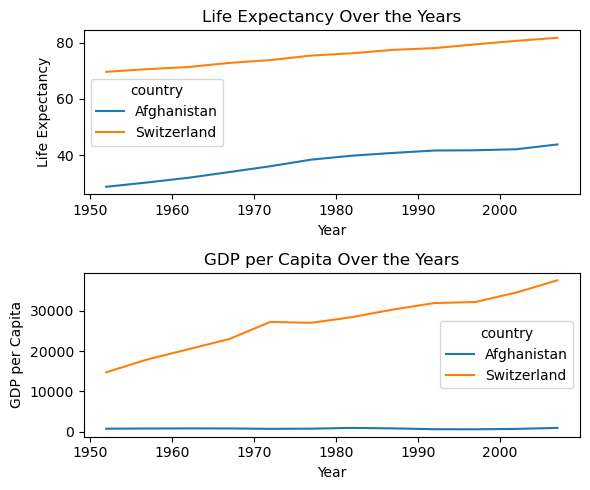

In [64]:

# Plot line graphs to show the trends of life expectancy and GDP per capita over the years
fig, ax2 = plt.subplots(2, 1, figsize=(6,5))

# Line graph for life expectancy
sns.lineplot(data=df_14, x='year', y='life_exp', hue='country', ax=ax2[0])
ax2[0].set_title('Life Expectancy Over the Years')
ax2[0].set_ylabel('Life Expectancy')
ax2[0].set_xlabel('Year')

# Line graph for GDP per capita
sns.lineplot(data=df_14, x='year', y='gdp_cap', hue='country', ax=ax2[1])
ax2[1].set_title('GDP per Capita Over the Years')
ax2[1].set_ylabel('GDP per Capita')
ax2[1].set_xlabel('Year')

plt.tight_layout()
plt.show()

`Subjective Question:` **What differences do you observe in terms of life expectancy and economic development? How might the stability or instability of a country influence these key metrics over time? Analyze the data through these visualizations and discuss your inferences.**

#### Observations:

`Life Expectancy:`

- **Afghanistan:** The life expectancy in Afghanistan has shown a gradual increase over the years but remains significantly lower compared to Switzerland.
- **Switzerland:** Switzerland has consistently high life expectancy, with a steady increase over the years.

`GDP per Capita:`

- **Afghanistan:** The GDP per capita in Afghanistan is relatively low and shows minor fluctuations over the years.
- **Switzerland:** Switzerland has a high GDP per capita, which has steadily increased over the years.

#### Analysis:

`Stability and Life Expectancy:`

- **Afghanistan:** The lower life expectancy in Afghanistan can be attributed to various factors, including political instability, lack of access to healthcare, and ongoing conflicts. These factors contribute to higher mortality rates and lower overall life expectancy.
- **Switzerland:** The high life expectancy in Switzerland is indicative of a stable and well-developed healthcare system, higher standards of living, and better access to medical services.

`Stability and Economic Development:`

- **Afghanistan:** The economic development in Afghanistan is hindered by instability, conflicts, and lack of infrastructure. These factors limit economic growth and result in a lower GDP per capita.
- **Switzerland:** Switzerland's stable political environment, strong institutions, and robust economic policies contribute to its high GDP per capita. The country's stability attracts investments and promotes economic growth.

#### Inferences:

- `Impact of Stability:`
Stability plays a crucial role in determining both life expectancy and economic development. Countries with stable political environments and strong institutions tend to have higher life expectancy and better economic outcomes.
- `Long-term Trends:`
The visualizations highlight the long-term trends in life expectancy and GDP per capita, showing how stability and development policies impact these metrics over time.


**In summary, the stability or instability of a country significantly influences key metrics such as life expectancy and economic development. Stable countries like Switzerland exhibit higher life expectancy and GDP per capita, while unstable countries like Afghanistan face challenges in improving these metrics.**

## Extras

In [69]:
gf['life_exp'][gf['year'].dt.year==2007].mean().round(1)

67.0

In [70]:
gf['gdp_cap'][gf['year'].dt.year==2007].mean().round(1)

11680.1

In [71]:
gf['population'][gf['year'].dt.year==2007].sum()

6251013179